### Importing required Libraries

In [1]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#nltk toolkit
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn import model_selection, svm\n\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\n\nfrom scikitplot.metrics import plot_confusion_matrix, plot_roc\n\nimport tensorflow as tf\nfrom keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\nfrom tensorflow.keras.utils import to_categorical\nfrom gensim.models import Word2Vec\nfrom gensim.models.keyedvectors import KeyedVectors\nimport time\nfrom keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout\nfrom keras.layers import Conv1D, MaxPooling1D, Embedding\nfrom keras.models import Sequential, load_model\nfrom keras import losses\nfrom tensorflow.keras.optimizers import Adam\nfrom te

### Loading Dataset

In [2]:
df = pd.read_csv('mental_health.csv')
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [3]:
df.shape

(27977, 2)

#### Creating columns
  

1.   total words
2.   total chars




In [4]:
def total_char_count(text):
    char = 0
    for x in text.split():
        char += len(x)
    return char
    
df['Total Words'] = df['text'].apply(lambda x: len(x.split(" ")))
df['Total Chars'] = df["text"].apply(total_char_count)

##### Total Words & charcters in the doc

In [5]:
print(f'Total number of words in the document: {df["Total Words"].sum()}')

Total number of words in the document: 2043667


In [6]:
print(f'Total number of charcters in the document: {df["Total Chars"].sum()}')

Total number of charcters in the document: 10981760


### Preprocessing text

#### Lowercasing text

In [7]:
df['text'] = df['text'].apply(lambda x: x.lower())
df.head(2)

,text,label,Total Words,Total Chars
0,dear american teens question dutch person hear...,0,24,112
1,nothing look forward lifei dont many reasons k...,1,20,98


#### Removing URL and special characters

In [8]:
remove_url = re.compile('https?://\S+|www\.\S+')

In [9]:
df['text'] = df["text"].apply(lambda x: remove_url.sub('',x))

#### Removing STOP words

In [10]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['text'] = df['text'].apply(remove_stopwords)

#### Stemming

In [11]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['text'] = df['text'].apply(perform_stemming)

In [12]:
df.shape

(27977, 4)

In [13]:
df

,text,label,Total Words,Total Chars
0,dear american teen question dutch person heard...,0,24,112
1,noth look forward lifei dont mani reason keep ...,1,20,98
2,music recommend im look expand playlist usual ...,0,64,387
3,im done tri feel betterth reason im still aliv...,1,102,493
4,worri year old girl subject domest physicalmen...,1,315,1819
...,...,...,...,...
27972,post everyday peopl stop care religion matter ...,0,29,172
27973,okay definetli need hear guy opinion ive prett...,0,167,812
27974,cant get dog think ill kill myselfth last thin...,1,33,157
27975,what point princess bridei realli think like w...,1,97,507


##### Lemmatizing

In [14]:
#function to lemmatize the text 
def text_to_lemma_frequencies(text, remove_stop_words=True):
    
    # split document into sentences
    sentences = nltk.sent_tokenize(text)
    
    # create a place to store (word, pos_tag) tuples
    words_and_pos_tags = []
    
    # get all words and pos tags
    for sentence in sentences:
        words_and_pos_tags += nltk.pos_tag(nltk.word_tokenize(sentence))
        
    # load the lemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    # lemmatize the words
    lemmas = [lemmatizer.lemmatize(word,lookup_pos(pos)) for \
              (word,pos) in words_and_pos_tags]
    
    # convert to lowercase
    lowercase_lemmas = [lemma.lower() for lemma in lemmas]
    
    # load the stopword list for English
    stop_words = set([])
    if remove_stop_words:
        stop_words = set(nltk.corpus.stopwords.words('english'))
    
    # add punctuation to the set of things to remove
    all_removal_tokens = stop_words | set(string.punctuation)
    
    # bonus: also add some custom double-quote tokens to this set
    all_removal_tokens |= set(["''","``"])
    
    # only get lemmas that aren't in these lists
    content_lemmas = [lemma for lemma in lowercase_lemmas \
                      if lemma not in all_removal_tokens]
    
    # return the frequency distribution object
    return nltk.probability.FreqDist(content_lemmas)
    
# Lemmatization -- redefining this here to make
# code block more self-contained
def lookup_pos(pos):
    pos_first_char = pos[0].lower()
    if pos_first_char in 'nv':
        return pos_first_char
    else:
        return 'n'

##### Function to generate Wordcloud

In [15]:
#function to generate a worldcloud
def draw_wordcloud(freq_dist, colormap):
    plt.figure(figsize = (12, 8))
    #TODO add a few corpus specific checks here to make sure people have done casing, lemmatization, punct removal
    uniq_count = len(freq_dist.keys())
    print("Building a word cloud with",uniq_count,"unique words...")
    wc = WordCloud(colormap=colormap, width=1500, 
                   height=1000).generate_from_frequencies(freq_dist)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

## **Word cloud for Poisionous word**

In [16]:
df_poisionous = df[df["label"] == 1]

##### Frequency Distribution Plot

In [17]:
# Get the word frequency distribution
freq_dist_P = text_to_lemma_frequencies(''.join(df_poisionous['text']))
freq_dist_P

FreqDist({'im': 26851, 'want': 17918, 'get': 17251, 'feel': 17104, 'like': 16109, 'go': 15409, 'know': 13940, 'life': 12334, 'think': 12156, 'time': 9669, ...})

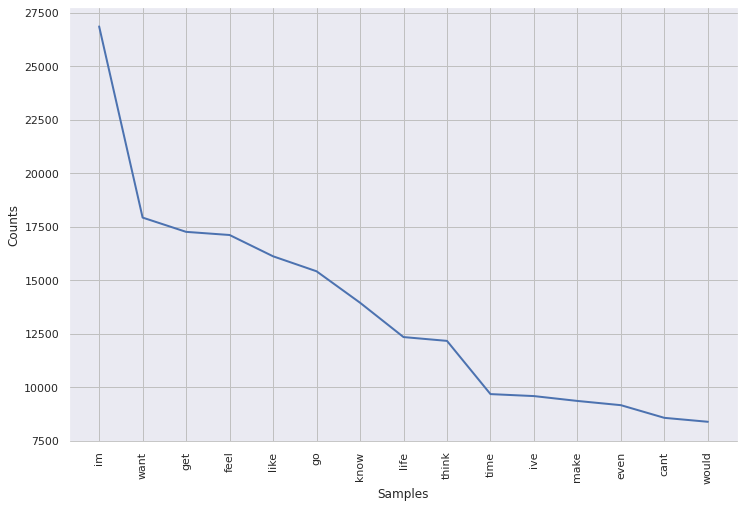

In [18]:
plt.figure(figsize = (12, 8))
freq_dist_P.plot(15,cumulative=False)
plt.show()

##### Wordcloud

Building a word cloud with 41374 unique words...


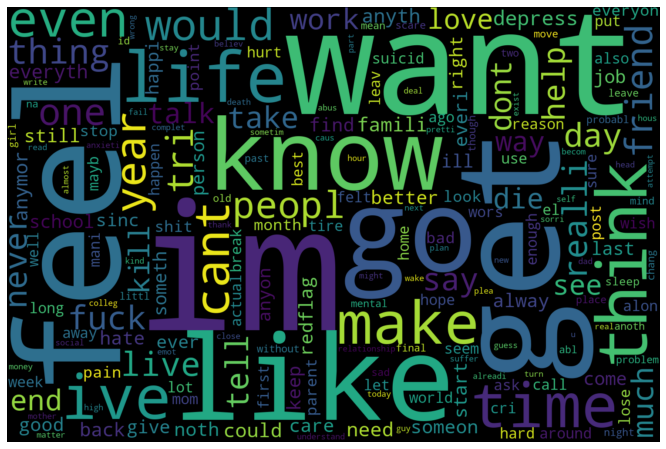

In [19]:
colormap = None
# draw the word cloud
draw_wordcloud(freq_dist_P, colormap)

## **Word cloud for Non-Poisionous word**

In [20]:
df_not_posionous = df[df["label"] == 0]

##### Frequency Distribution Plot

In [21]:
# Get the word frequency distribution
freq_dist_NP = text_to_lemma_frequencies(''.join(df_not_posionous['text']))
freq_dist_NP

FreqDist({'like': 7270, 'im': 6052, 'get': 6005, 'br': 5505, 'film': 4699, 'one': 4593, 'make': 4375, 'movi': 4315, 'go': 3805, 'know': 3590, ...})

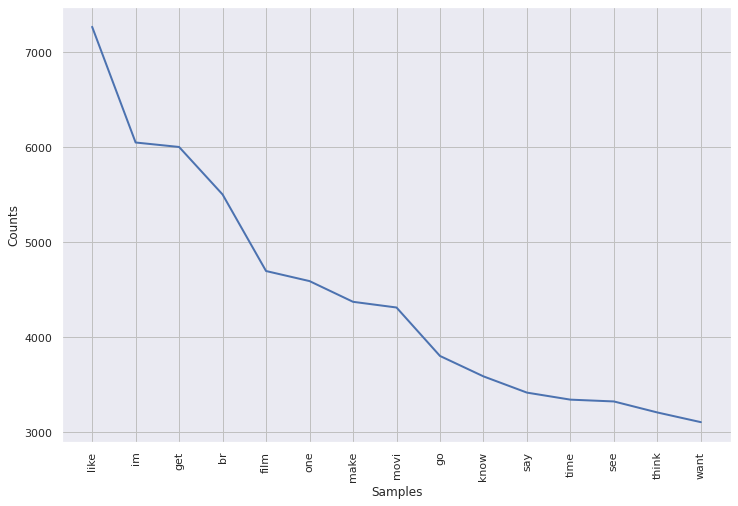

In [22]:
plt.figure(figsize = (12, 8))
freq_dist_NP.plot(15,cumulative=False)
plt.show()

##### Wordcloud

Building a word cloud with 47954 unique words...


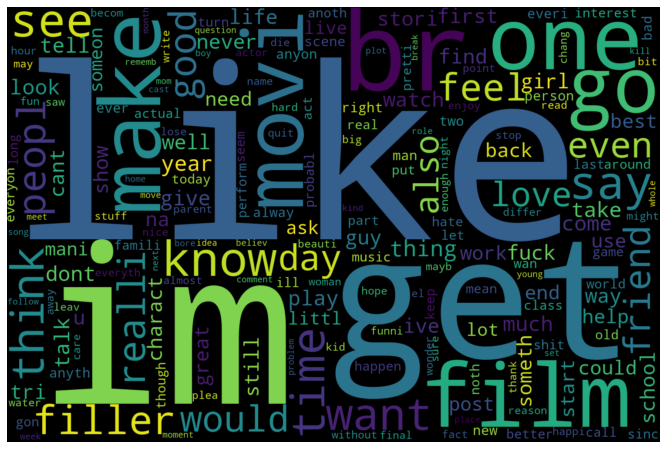

In [23]:
# draw the word cloud
colormap = None
draw_wordcloud(freq_dist_NP, colormap)

##### Thank you